# Linear regression

Often we have a set of experimental data that we want to fit a line through.


First let's define our model:
\begin{align*}
f(x; a, b) &= a x + b
\end{align*}

In [1]:
def f(x, a, b):
    
    y = a*x + b
    
    return y

Now let's generate some "experimental" data with some measurement error.  We will assume that the true value of the slope $a=1$ and the intercept $b=1$.  Due to various factors, the values that we measure will deviate from the "actual" value.  We will simulate this by assuming that the errors are given by a Gaussian distribution.  Measurements of $x$ will be distributed around the exact value with a Gaussian distribution with standard deviation $\sigma_x$, and measurements of $y$ will be distributed according to a Gaussian distribution with standard deviation $\sigma_y$.

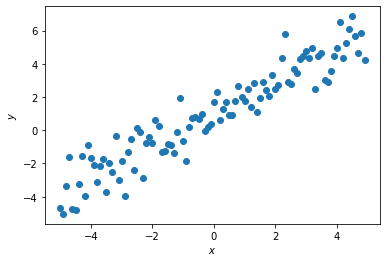

In [4]:
import numpy as np
from numpy.random import normal


def get_measurement():
    a = 1.0
    b = 1.0
    x_exact = np.arange(-5.0, 5.0, 0.1)
    y_exact = [f(x, a, b) for x in x_exact]
    N = len(x_exact)  # this is the number of measurements

    sig_x = 0.0
    sig_y = 1.0
    x_err = normal(0.0, sig_x, N)
    y_err = normal(0.0, sig_y, N)
    x_meas = [x + x1 for x, x1 in zip(x_exact, x_err)]
    y_meas = [y + y1 for y, y1 in zip(y_exact, y_err)]
    
    return x_meas, y_meas


import pylab as plt

x_meas, y_meas = get_measurement()
plt.plot(x_meas, y_meas, 'o')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()



Now let's write a function that performs a linear fit of data.

We take our objective function to be
\begin{equation*}
F(a,b,\dots) = \sum_k\left[y_k - f(x_k; a, b, \dots)\right]^2
\end{equation*}

To find the best fit line, we minimize the objective function with respect to the slope $a$ and intercept $b$ of the line
\begin{align*}
\frac{\partial F}{\partial a} &= -2 \sum_k [y_k-(ax_k+b)] x_k = 0
\\
\frac{\partial F}{\partial b} &= -2 \sum_k [y_k-(ax_k+b)] = 0
\end{align*}
This can be rewritten as
\begin{align*}
a S_{xx} + b S_x &= S_{xy} 
\\
a S_x + b &= S_y 
\end{align*}
where
\begin{align*}
S_{x} &= \frac{1}{N} \sum_{k=1}^N x_k,
\quad
S_{y} = \frac{1}{N} \sum_{k=1}^N y_k
\\
S_{xx} &= \frac{1}{N} \sum_{k=1}^N x_k^2,
\quad
S_{xy} = \frac{1}{N} \sum_{k=1}^N x_ky_k
\end{align*}


Finally, we arrive at
\begin{align*}
a &= \frac{S_{xy}-S_xS_y}{S_{xx}-S_x^2}
\\
b &= \frac{S_{xx}S_y-S_xS_{xy}}{S_{xx}-S_x^2}
\end{align*}


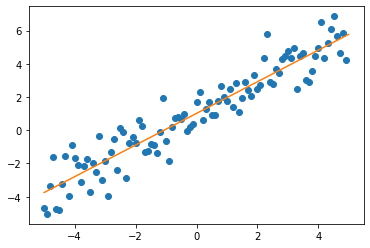

In [5]:
def get_fit(x_data, y_data):

    N = float(len(x_data))
    Sx = 0.0
    Sy = 0.0
    Sxx = 0.0
    Syy = 0.0
    Sxy = 0.0
    for x, y in zip(x_data, y_data):
        Sx += x
        Sy += y
        Sxx += x*x
        Syy += y*y
        Sxy += x*y
    Sx /= N
    Sy /= N
    Sxx /= N
    Syy /= N
    Sxy /= N
        
    a = (Sxy-Sx*Sy)/(Sxx-Sx*Sx)
    b = (Sxx*Sy-Sx*Sxy)/(Sxx-Sx*Sx)
    
    return a, b

a, b = get_fit(x_meas, y_meas)
x_fit = np.arange(-5.0, 5.0, 0.01)
y_fit = [f(x, a, b) for x in x_fit]

plt.plot(x_meas, y_meas, 'o')
plt.plot(x_fit, y_fit)
plt.show()

This was a fit for only one set of measurements.  What happens if we try to perform this experiment many, many times?

1.0000687197382694


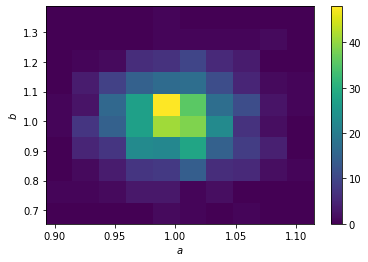

In [6]:
N_exp = 1000

a_data = []
b_data = []
for i in range(N_exp):
    
    x_meas, y_meas = get_measurement()
    a, b = get_fit(x_meas, y_meas)
    a_data.append(a)
    b_data.append(b)
    
#count_a, bins_a, hist_a = plt.hist(a_data, histtype='step', label=r'$a$')
#count_b, bins_b, hist_b = plt.hist(b_data, histtype='step', label=r'$b$')
#plt.legend()
from statistics import mean
print(mean(a_data))

plt.hist2d(a_data, b_data, density='True')
plt.xlabel(r'$a$')
plt.ylabel(r'$b$')
plt.colorbar()
plt.show()


So we see that there is a distribution of the fit parameters $a$ and $b$.  This distribution represents the probability density that a particular set of values would be inferred from a particular measurement.  While their values are distributed around the "actual" value of $a=1$ and $b=1$, they will in general deviate from these values.  The width of this distribution characterizes the uncertainty in the estimate of the parameters.

## Issues to reflect upon

- How are the widths in the distributions for the slope and the intercept related to the uncertainty (i.e. standard deviations) in the experimental data?
- Is there a bias in the estimates for $a$ and $b$?
- If different experimental data points have different uncertainties, what is the best way to modify the objective function to obtain the most "narrow" distribution for $a$ and $b$?